https://vgpena.github.io/classifying-tweets-with-keras-and-tensorflow/

En el anterior enlace, tenéis un ejemplo sobre cómo, a partir de tweets con un label específico (un sentimiento, positivo o negativo): 

1. Genera un conjunto de entrenamiento. El conjunto de entrenamiento es formado a partir de tweets completos pasados a un array con un tamaño específico.
2. Ese array (X_train de tamaño N) tiene un label que representa el sentimiento (y_train)
3. Como todas las frases tienen un tamaño N, la entrada de la red neuronal será de tamaño N y la salida de la red será de tamaño 2 usando activación softmax(porque hay dos clases).

Se pide: 

- Realizar un clasificador de reviews para el dataset de IMDB de la carpeta data_exercise/

**Cuando usa la importación "keras.x", reemplázalo por "tensorflow.keras.x"**

# Your code
"""
De
from keras.preprocessing.text import Tokenizer
Usa
from tensorflow.keras.preprocessing.text import Tokenizer
"""
print()

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import json

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.preprocessing.text as kpt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data_exercise/IMDB Dataset.csv")
data.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [3]:
X = data.review
y = data.sentiment

print(X.shape)
print(y.shape)

(50000,)
(50000,)


In [4]:
y.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
y = y.replace(["positive", "negative"], [1, 0])
y.value_counts()

0    25000
1    25000
Name: sentiment, dtype: int64

In [6]:
y = np.asarray(y)

In [7]:
max_words = 3000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X)

In [8]:
dictionary = tokenizer.word_index

with open("dictionary.json", "w") as outfile:
    json.dump(dictionary, outfile)

In [9]:
def convert_text_to_index_array(text):
    index_array = [dictionary[word] for word in kpt.text_to_word_sequence(text)]
    return index_array

In [10]:
allWordIndices = []

for text in X:
    WordIndices = convert_text_to_index_array(text)
    allWordIndices.append(WordIndices)

In [11]:
allWordIndices = np.asarray(allWordIndices)

X_train = tokenizer.sequences_to_matrix(allWordIndices, mode = "binary")

In [12]:
print(len(allWordIndices))
print(len(allWordIndices[1]))

50000
164


In [13]:
y_train = keras.utils.to_categorical(y, 2)

In [14]:
model = Sequential([
    layers.Dense(512, input_shape = (max_words,), activation = "relu"),
    layers.Dropout(.5),
    layers.Dense(256, activation = "sigmoid"),
    layers.Dropout(.5),
    layers.Dense(2, activation = "softmax")
])

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["CategoricalAccuracy"])

In [15]:
model_history = model.fit(X_train, y_train,
                          batch_size = 32,
                          epochs = 5,
                          verbose = 1,
                          validation_split = .1,
                          shuffle = True)

Epoch 1/5
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3287 - categorical_accuracy: 0.8567 - val_loss: 0.3079 - val_categorical_accuracy: 0.8704
Epoch 2/5
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2505 - categorical_accuracy: 0.8959 - val_loss: 0.2730 - val_categorical_accuracy: 0.8834
Epoch 3/5
1407/1407 [==============================] - 9s 7ms/step - loss: 0.1985 - categorical_accuracy: 0.9160 - val_loss: 0.2793 - val_categorical_accuracy: 0.8832
Epoch 4/5
1407/1407 [==============================] - 9s 7ms/step - loss: 0.1252 - categorical_accuracy: 0.9464 - val_loss: 0.3464 - val_categorical_accuracy: 0.8828
Epoch 5/5
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0749 - categorical_accuracy: 0.9686 - val_loss: 0.4462 - val_categorical_accuracy: 0.8852


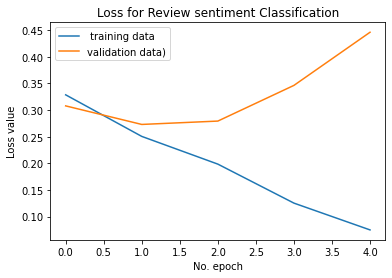

In [16]:
plt.plot(model_history.history['loss'], label=' training data')
plt.plot(model_history.history['val_loss'], label='validation data)')
plt.title('Loss for Review sentiment Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

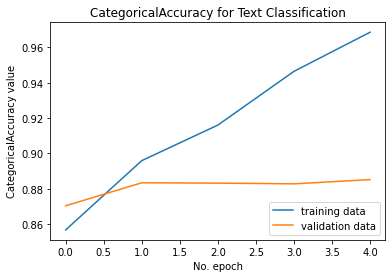

In [17]:
plt.plot(model_history.history['categorical_accuracy'], label='training data')
plt.plot(model_history.history['val_categorical_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()